<a href="https://colab.research.google.com/github/mralinp/cnn-networks/blob/main/vgg16/vgg16_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Feb  9 17:12:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1024, 1024, 64)    1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1024, 1024, 64)    36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 512, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0     

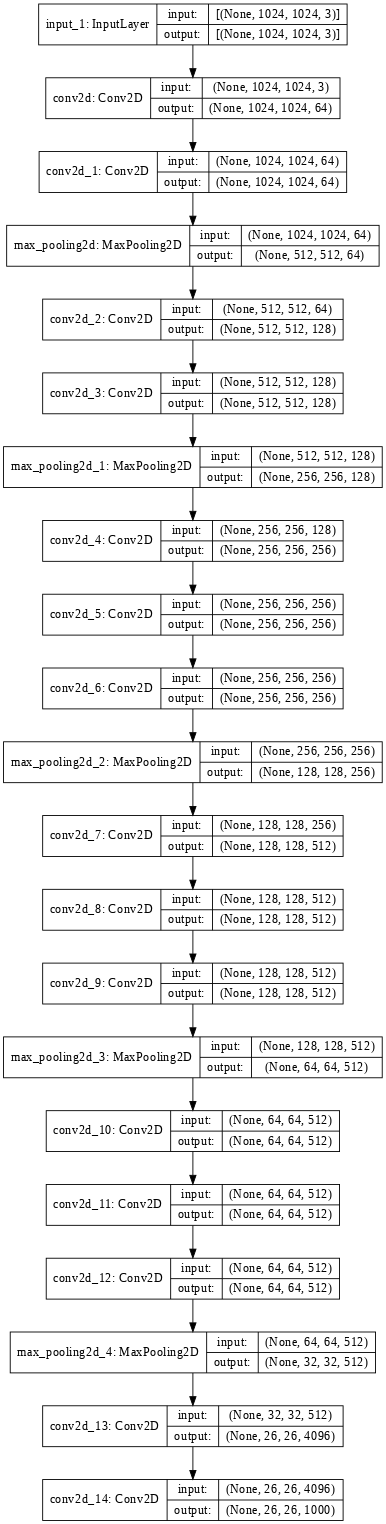

In [2]:
init = tf.random_normal_initializer(0., 0.02)

input1 = tf.keras.layers.Input(shape=[1024,1024,3])

conv1_1 = tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", activation="relu")(input)
conv1_2 = tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", activation="relu")(conv1_1)
pooling1 = tf.keras.layers.MaxPool2D()(conv1_2)

conv2_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(pooling1)
conv2_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(conv2_1)
pooling2 = tf.keras.layers.MaxPooling2D()(conv2_2)

conv3_1 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(pooling2)
conv3_2 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(conv3_1)
conv3_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(conv3_2)
pooling3 = tf.keras.layers.MaxPooling2D()(conv3_3)

conv4_1 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(pooling3)
conv4_2 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(conv4_1)
conv4_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(conv4_2)
pooling4 = tf.keras.layers.MaxPooling2D()(conv4_3)

conv5_1 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(pooling4)
conv5_2 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(conv5_1)
conv5_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(conv5_2)
pooling5 = tf.keras.layers.MaxPooling2D()(conv5_3)

dense1 = tf.keras.layers.Conv2D(filters=4096, kernel_size=7, activation="relu")(pooling5)
output = tf.keras.layers.Conv2D(filters=1000, kernel_size=1, activation="relu")(dense1)
# output = tf.keras.activations.softmax(dense2)

vgg16 = tf.keras.Model(input, output)
vgg16.summary()
tf.keras.utils.plot_model(vgg16, show_shapes=True, dpi=64)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


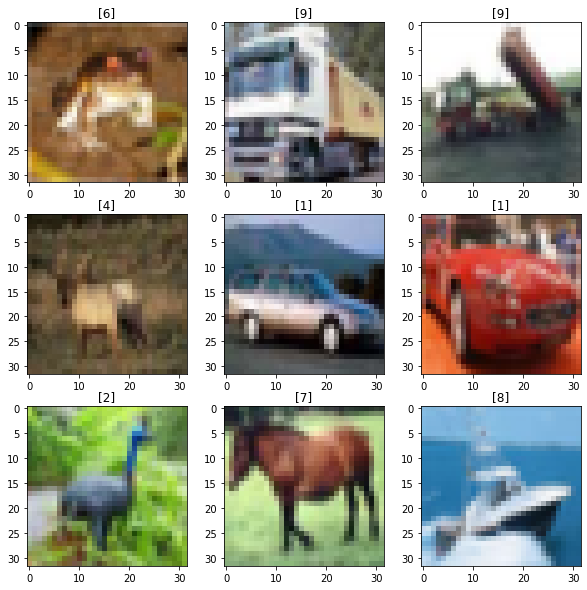

In [ ]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# show dataset
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
plt.show()